In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
from sklearn.tree import export_graphviz

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso

from scipy import interp
from itertools import cycle
import numpy as np
from numpy.linalg import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import datasets
from sklearn import svm

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [56]:
csv_fpath = os.path.expanduser('~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
CarData = pd.read_csv(csv_fpath)
CarData.head()

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,Unspecified,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Unspecified,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN


In [3]:
%store -r CarDataKnown

In [4]:
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0


In [5]:
%store -r citydataknown
citydataknown.head()

,Borough,Population,Injuries,proportion inj to pop
0,Bronx,1432132,45165,0.031537
1,Queens,2278906,79813,0.035023
2,Manhattan,1628701,46879,0.028783
3,Brooklyn,2582830,102527,0.039696
4,Staten Island,476179,12223,0.025669


In [6]:
CarDataKnown['ped_affected'] = CarData['NUMBER OF PEDESTRIANS KILLED'] + CarData['NUMBER OF PEDESTRIANS INJURED']
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0


In [7]:
CarDataKnown['ped_tf'] = CarData['NUMBER OF PEDESTRIANS KILLED'] + CarData['NUMBER OF PEDESTRIANS INJURED']
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0,0


In [9]:
borough_dummy = CarDataKnown.BOROUGH.str.get_dummies()

In [61]:
CarDataWDummies = pd.concat([CarDataKnown,borough_dummy],axis=1)
CarDataWDummies.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0,0,0,0,0,0,1,0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0,0,0,0,1,0,0,0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0,0,0,0,0,0,1,0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0,0,0,0,0,0,1,0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0,0,0,1,0,0,0,0


In [34]:
value_counts = CarData["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = CarData[~CarData['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')
print(print(data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Human            946398
Unspecified      606315
Vehicular         74935
Environmental     38429
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64
None


In [35]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Environmental,Human,Unspecified,Vehicular
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,4276854,Sedan,Sedan,NaN,NaN,NaN,0,1,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,4289613,AMBUL,AMBUL,NaN,NaN,NaN,0,1,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,4279961,Taxi,NaN,NaN,NaN,NaN,0,1,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,1,0,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,1,0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0,0,1,0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,0,1,0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,4289056,Sedan,Sedan,NaN,NaN,NaN,0,0,0,1
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,0,1,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,4281172,Sedan,4 dr sedan,NaN,NaN,NaN,0,1,0,0


In [88]:
cardata = pd.concat([CarDataWDummies,factor_dummy],axis=1)
cardata.head(5000)

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,...,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,QUEENS,1.0,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,BROOKLYN,2.0,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,QUEENS,1.0,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,QUEENS,1.0,40.765503,-73.863840,2.0,0.0,15.0,14.516667,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4996,MANHATTAN,3.0,40.756240,-73.991450,0.0,0.0,11.0,11.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0


In [86]:
for col in cardata.columns: 
    print(col)

BOROUGH
borough_num
LATITUDE
LONGITUDE
injuries_int
killed_int
time_int
time_num
inj_bin
killed_bin
number_affected
ped_affected
ped_tf
BRONX
BROOKLYN
MANHATTAN
QUEENS
STATEN ISLAND
Environmental
Human
Unspecified
Vehicular


In [99]:
cardata.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,...,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,QUEENS,1.0,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,BROOKLYN,2.0,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,QUEENS,1.0,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [100]:
print(cardata.shape)

(1670603, 22)


In [103]:
del cardata['BOROUGH']
del cardata['borough_num']
cardata.head()

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,ped_tf,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,40.744590,-73.884674,0.0,0.0,19.0,19.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
3,40.703762,-73.935620,0.0,0.0,9.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40.716946,-73.911194,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data = data.dropna()
data = data[data.LONGITUDE !=0

In [108]:
cardata['LATITUDE'].dropna()

1          40.744590
3          40.703762
4          40.716946
5          40.636536
6          40.774540
             ...    
1670612    40.785171
1670613    40.772344
1670614    40.768802
1670615    40.754348
1670617    40.902044
Name: LATITUDE, Length: 1131475, dtype: float64

In [115]:
cardata.head(20)

,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected,ped_affected,...,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Environmental,Human,Unspecified,Vehicular,PERSONS_TF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0
1113750,40.693356,-73.727913,1.0,0.0,16.0,15.833333,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1113760,40.672603,-73.993378,0.0,0.0,9.0,8.666667,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1113758,40.750766,-73.974443,0.0,0.0,5.0,4.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1113735,40.802024,-73.949681,0.0,0.0,9.0,8.800000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1113757,40.643305,-73.947790,1.0,0.0,22.0,21.833333,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1113756,40.585741,-73.932336,1.0,0.0,13.0,13.366667,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1113755,40.721639,-73.869869,0.0,0.0,17.0,17.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1113754,40.820006,-73.958874,0.0,0.0,17.0,17.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1113753,40.664964,-73.989813,1.0,0.0,10.0,10.000000,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [104]:
X_feat = cardata[['LATITUDE',"LONGITUDE",'time_num','BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','Environmental','Human','Unspecified','Vehicular']]
y = cardata['ped_tf']
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

dtc = DecisionTreeClassifier(criterion='entropy') 
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'min_samples_leaf':[10,20,30,40,50,60]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(20)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
Xs = datanew[['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']]
y = CarDataKnown['inj_bin']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [28]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=500)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.48620191
Iteration 2, loss = 0.48576862
Iteration 3, loss = 0.48567438
Iteration 4, loss = 0.48562977
Iteration 5, loss = 0.48560515
Iteration 6, loss = 0.48557443
Iteration 7, loss = 0.48558889
Iteration 8, loss = 0.48555654
Iteration 9, loss = 0.48558779
Iteration 10, loss = 0.48557307
Iteration 11, loss = 0.48554443
Iteration 12, loss = 0.48557084
Iteration 13, loss = 0.48555268
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


NameError: name 'model' is not defined

In [29]:
print(mlp.score(X_test,y_test))

0.808740802934223


In [31]:
y_pred = mlp.predict(X_test)
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

Null accuracy on the test set:  0.19125919706577696
Sensitivity/Recall (TPR):  0.0
Precision (PPV):  0.0
F1: 0.0


/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

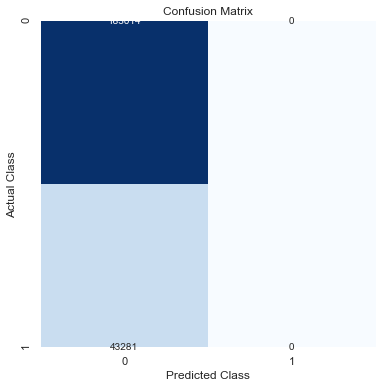

In [30]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

In [ ]:
logreg = LogisticReegression(solver='relu', random_state =1)

logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

score = logreg.score(X_test,y_test)
print(score)

In [ ]:
y_pred = model.predict(X_test)
print(mlp.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
print("F1:", metrics.f1_score(y_test,y_pred))

In [ ]:
test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

In [116]:
Xs = CarDataKnown[['LATITUDE','LONGITUDE']]
y = CarDataKnown['ped_tf']
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=500)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

Iteration 1, loss = 0.24305383
Iteration 2, loss = 0.23319632
Iteration 3, loss = 0.23295300
Iteration 4, loss = 0.23277961


Iteration 1, loss = 0.48729800
Iteration 2, loss = 0.48512855
Iteration 3, loss = 0.48481170
Iteration 4, loss = 0.48451123
Iteration 5, loss = 0.48432565
Iteration 6, loss = 0.48419093
Iteration 7, loss = 0.48397192
Iteration 8, loss = 0.48351258
Iteration 9, loss = 0.48314105
Iteration 10, loss = 0.48301860
Iteration 11, loss = 0.48298540
Iteration 12, loss = 0.48288096
Iteration 13, loss = 0.48285177
Iteration 14, loss = 0.48280568
Iteration 15, loss = 0.48278734
Iteration 16, loss = 0.48308274
Iteration 17, loss = 0.48276967
Iteration 18, loss = 0.48274739
Iteration 19, loss = 0.48273550
Iteration 20, loss = 0.48270607
Iteration 21, loss = 0.48268029
Iteration 22, loss = 0.48259644
Iteration 23, loss = 0.48259373
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

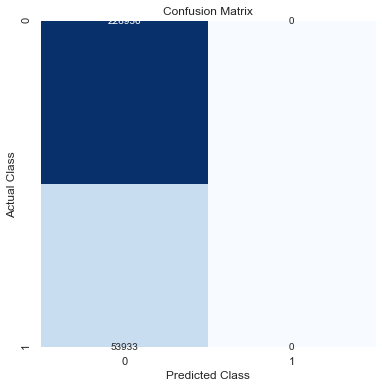

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25)
mlp.fit(X_train,np.ravel(y_train))

test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

In [1]:
CarDataKnown.head()

NameError: name 'CarDataKnown' is not defined